In [240]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import re
#to access our implemented ML functions
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [241]:
from implementations import *

In [242]:
Energy_range = [0.1, 0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
data_path = data_file(20.0)

In [243]:
df = build_df(data_path)

In [320]:
Energy_range_tot =  [0.2, 0.3, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0]
Energy_range =  [20.0]
datapath = data_file(0.1)
data_E = build_df(datapath)
data_E = clean_df(data_E)
data = data_E
for E in Energy_range:
    datapath = data_file(E)
    data_E = build_df(datapath)
    data_E = clean_df(data_E)
    print(E)
    data = pd.concat([data,data_E])

20.0


## Building of clean dataframe

In [277]:
data.shape[0]

4933331

In [321]:
X, y = creation_array(data)

In [322]:
X[:,6].shape

(1118599,)

In [323]:
y[:,1].shape

(1118599,)

In [324]:
x_plot = X[:,6]
#We wand to plot the Energy that is at position 1 in y
y_plot = y[:,1]
#we want now the cos_teta :
#y_plot = y[:,2]
#for the distance : 
#y_plot = y[:,3]

len(y_plot)

1118599

In [325]:
len(x_plot)

1118599

In [326]:
(y[:,2]<0).sum()

29913

In [327]:
#plot only for no emission : 
idx_noemission = y[:,3]==2
y_to_plot = y_plot[idx_noemission]
X_to_plot = x_plot[idx_noemission]

len(y_to_plot)/len(x_plot)*100

5.093961285500881

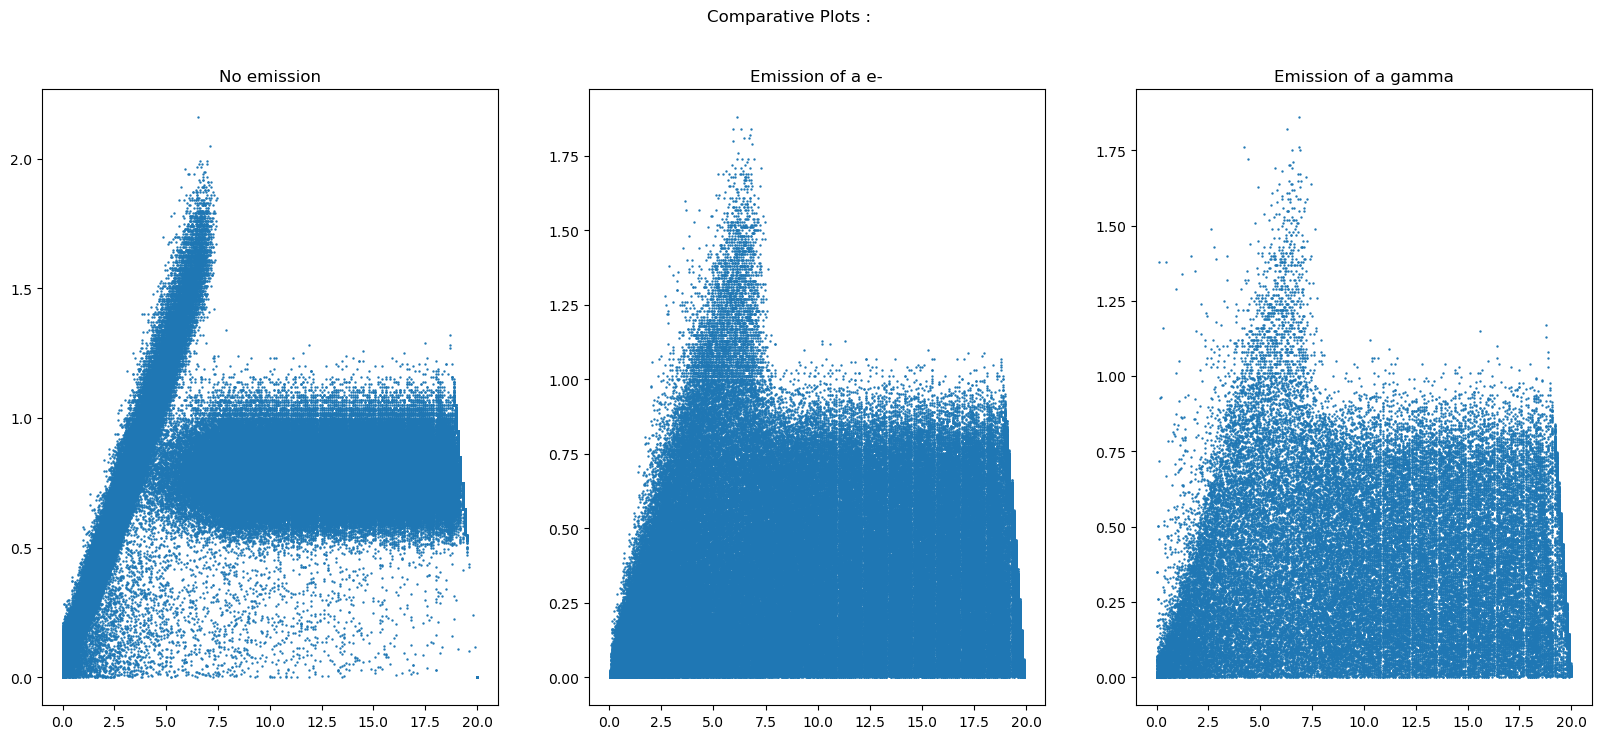

In [328]:
fig, axes = plt.subplots(1,3)
fig.suptitle('Comparative Plots : ')

for i in range(3):
    idx_noemission = y[:,3]==i
    y_to_plot = y_plot[idx_noemission]
    X_to_plot = x_plot[idx_noemission]
    
    axes[i].scatter(X_to_plot, y_to_plot, s = 0.5)
axes[0].set_title("No emission")
axes[1].set_title("Emission of a e-")
axes[2].set_title("Emission of a gamma")
fig.set_figwidth(20)
fig.set_figheight(8)  
plt.show()

## The first step of our model will be the classification : no emission, emission of e- and emission of gamme

In [ ]:
#The output corresponding to the emission is : y[:,3]. We will train separatly the cases 

In [291]:
y_classification = y[:,3]

In [292]:
y_classification.shape

(4933330,)

In [333]:
X.shape

(1118599, 7)

In [334]:
X.shape[0]*0.75

838949.25

In [338]:
x_tr = X[0:838949, :]
x_te = X[838950:-1,:]
y_tr = y_classification[0:838949]
y_te = y_classification[838950:]

w_cla, loss = least_squares(y_tr, x_tr)
y_pred = np.dot(x_te,w_cla)

idx_noemission = y_te==0

print(y_pred.shape)
print(y_te[idx_noemission].shape)
print(y_te.shape)
print(y_pred)
print((y_pred>1).sum())

print((y_pred[idx_noemission] == y_te[idx_noemission]).sum())



(279648,)
(3605188,)
(4094380,)
[0.00185797 0.00179383 0.0015958  ... 0.0024246  0.00186352 0.00177065]
0


IndexError: boolean index did not match indexed array along dimension 0; dimension is 279648 but corresponding boolean dimension is 4094380

In [ ]:
#Rien n'est prédit en tant qu'émission ! Il faut trouver un modèle de classification qui met mieux en avant les
#évènements rares !!!

### Is it always Spawn_in_step == 1 ?

In [339]:
for E in Energy_range:
    df_check = clean_df(build_df(data_file(E)))
    Spawn_in_step = df_check[df_check.index == ':-----']['DZ']
    Spawn_in_step = Spawn_in_step.str.replace('(','',regex=True).str.replace('Rest=','',regex=True).astype('int')
    print('For Energy ', E, ' we have : ',Spawn_in_step[Spawn_in_step != 1].sum(), ' interactions that produce more than 1 one particule')

AttributeError: Can only use .str accessor with string values!

In [11]:
#Try to build the input and outputs corresponding to build a ML model

In [ ]:
### Very early `least_square` to check that the data is ready for ML processing